In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats

In [3]:
northwind = pd.read_csv('data-1574298326985.csv')

In [5]:
northwind.head()

,quantity,discount
0,12,0.0
1,10,0.0
2,5,0.0
3,9,0.0
4,40,0.0


In [6]:
northwind.describe()

,quantity,discount
count,2155.000000,2155.000000
mean,23.812993,0.056167
std,19.022047,0.083450
min,1.000000,0.000000
25%,10.000000,0.000000
50%,20.000000,0.000000
75%,30.000000,0.100000
max,130.000000,0.250000


In [7]:
northwind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 2 columns):
quantity    2155 non-null int64
discount    2155 non-null float64
dtypes: float64(1), int64(1)
memory usage: 33.8 KB


In [9]:
northwind.isnull().sum()

quantity    0
discount    0
dtype: int64

In [12]:
northwind['discount'].unique()

array([0.  , 0.15, 0.05, 0.2 , 0.25, 0.1 , 0.02, 0.03, 0.04, 0.06, 0.01])

In [19]:
northwind.groupby('discount').count()

,quantity
discount,
0.00,1317
0.01,1
0.02,2
0.03,3
0.04,1
0.05,185
0.06,1
0.10,173
0.15,157


In [21]:
northwind_proc = northwind.copy()

In [25]:
to_include = lambda x : True if x in [0,0.05,0.1,0.15,0.2,0.25] else False
northwind_proc['include'] = northwind['discount'].apply(to_include)

In [28]:
northwind_proc = northwind_proc.iloc[np.where(northwind_proc['include'])]

In [30]:
northwind_proc['discount'].unique()

array([0.  , 0.15, 0.05, 0.2 , 0.25, 0.1 ])

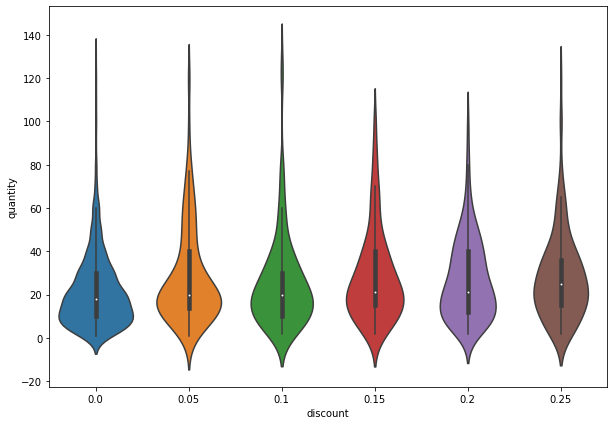

In [37]:
plt.figure(figsize=(10,7))
sns.violinplot(x='discount',y='quantity',data=northwind_proc)

In [38]:
discount = northwind_proc[northwind_proc['discount'] > 0]
nodiscount = northwind_proc[northwind_proc['discount'] == 0]

In [40]:
discount.head()

,quantity,discount,include
6,35,0.15,True
7,15,0.15,True
8,6,0.05,True
9,15,0.05,True
11,40,0.05,True


In [41]:
nodiscount.head()

,quantity,discount,include
0,12,0.0,True
1,10,0.0,True
2,5,0.0,True
3,9,0.0,True
4,40,0.0,True


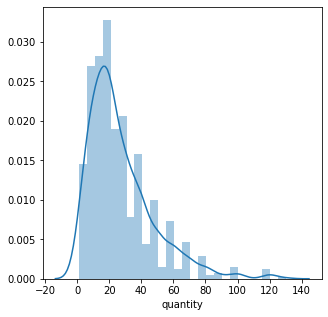

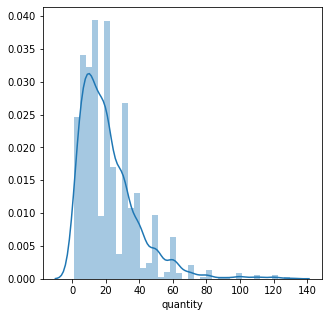

In [48]:
plt.figure(figsize=(5,5))
sns.distplot(discount['quantity'])

plt.figure(figsize=(5,5))
sns.distplot(nodiscount['quantity'])

In [45]:
print(len(discount),len(nodiscount))

830 1317


In [49]:
welch=sp.stats.ttest_ind(nodiscount['quantity'],discount['quantity'],equal_var='False')

In [53]:
print('H0 : difference of means of quantities of discount and nodiscount are the same')
print('H1 : no difference of means of quantities of discount and nodiscount are the same')
print('p-value = ',welch.pvalue)

H0 : difference of means of quantities of discount and nodiscount are the same
H1 : no difference of means of quantities of discount and nodiscount are the same
p-value =  1.7401995278127614e-11


Since p-value < alpha = 0.05 => there is a difference in means

Lets run an ANOVA to see if there is a difference on average total sale by employee

In [54]:
employee_total = pd.read_csv('data-1574300757291.csv')

In [55]:
employee_total.head()

,unit_price,quantity,employee_id
0,14.0,12,5
1,9.8,10,5
2,34.8,5,5
3,18.6,9,6
4,42.4,40,6


In [56]:
total_sale = employee_total.copy()
total_sale['total_sale'] = total_sale['unit_price'].multiply(total_sale['quantity'])

In [83]:
total_sale.head()

,unit_price,quantity,employee_id,total_sale
0,14.0,12,5,168.0
1,9.8,10,5,98.0
2,34.8,5,5,174.0
3,18.6,9,6,167.4
4,42.4,40,6,1696.0


In [84]:
total_sale.employee_id.unique()

array([5, 6, 4, 3, 9, 1, 8, 2, 7], dtype=int64)

In [62]:
avg_total_sale = total_sale.groupby('employee_id').mean()

In [65]:
avg_total_sale.head()

,unit_price,quantity,total_sale
employee_id,,,
1,25.311420,22.643478,585.923797
2,28.686349,25.124481,737.548797
3,27.253645,24.461059,663.711215
4,26.636405,23.328571,595.684405
5,23.482308,25.948718,645.878205


In [76]:
avg_total_sale.reset_index(level=0,inplace=True)

In [82]:
avg_total_sale.head()

,employee_id,unit_price,quantity,total_sale
0,1,25.311420,22.643478,585.923797
1,2,28.686349,25.124481,737.548797
2,3,27.253645,24.461059,663.711215
3,4,26.636405,23.328571,595.684405
4,5,23.482308,25.948718,645.878205


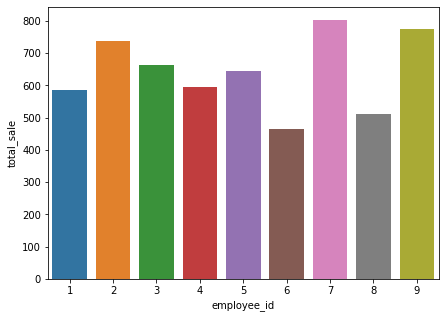

In [81]:
plt.figure(figsize=(7,5))
sns.barplot(x='employee_id',y='total_sale',data=avg_total_sale)